<a href="https://colab.research.google.com/github/Muhammed-AhmedGithup/imbalanced_data_solution/blob/main/imbalanced_data_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/sample_data/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df['target'].value_counts()

,count
target,
0.0,14381
1.0,4777


In [10]:
df_1=df[df['target']==1]
df_0=df[df['target']==0]

<Axes: xlabel='target', ylabel='count'>

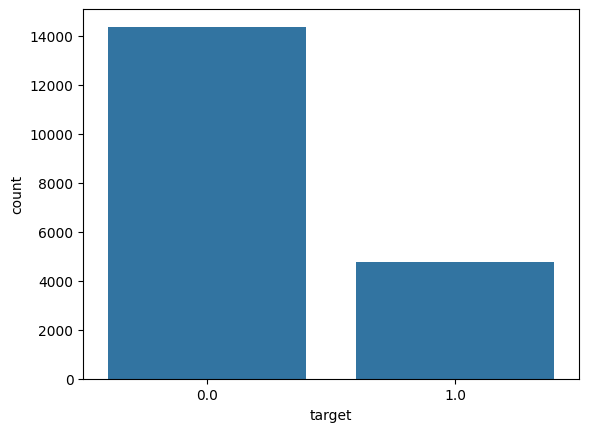

In [11]:
sns.barplot(df['target'].value_counts())

In [13]:
df_0under=df_0.sample(len(df_1))
df_1under=df_1.copy()
df_under_sample=pd.concat([df_0under,df_1under],axis=0)
df_under_sample['target'].value_counts()

,count
target,
0.0,4777
1.0,4777


<Axes: xlabel='target', ylabel='count'>

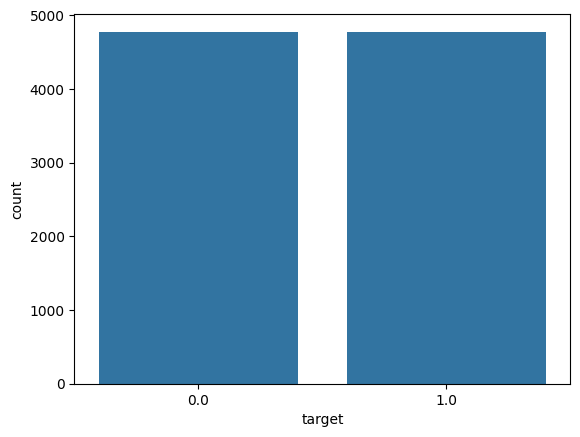

In [14]:
sns.barplot(df_under_sample['target'].value_counts())

In [15]:
df_1over=df_1.sample(len(df_0),replace=True)
df_0over=df_0.copy()
df_over_sample=pd.concat([df_0over,df_1over],axis=0)
df_over_sample['target'].value_counts()

,count
target,
0.0,14381
1.0,14381


<Axes: xlabel='target', ylabel='count'>

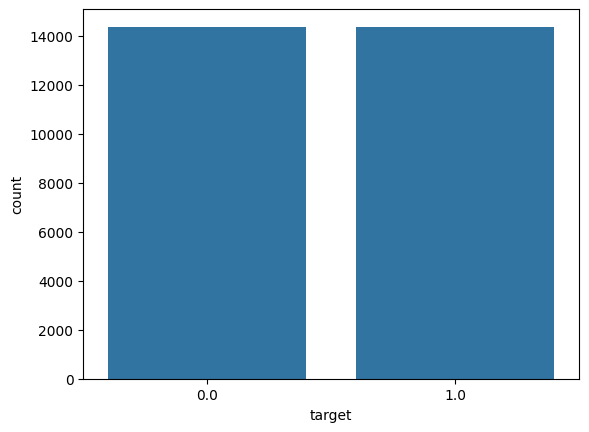

In [16]:
sns.barplot(df_over_sample['target'].value_counts())

In [17]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [18]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [31]:
x=pd.get_dummies(df.drop(['target','enrollee_id'],axis=1))
y=df['target']

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Random Oversampling**

target
1.0    11501
0.0    11501
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

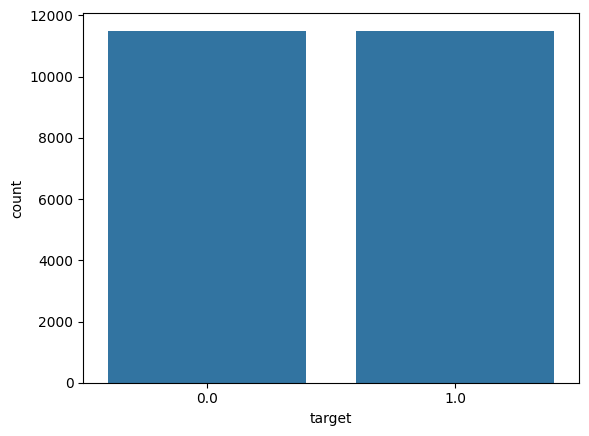

In [33]:
o_samle=RandomOverSampler(random_state=42)
x_train_o,y_train_o=o_samle.fit_resample(x_train,y_train)
print(y_train_o.value_counts())
sns.barplot(y_train_o.value_counts())

# **Random Undersampling**

target
0.0    3825
1.0    3825
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

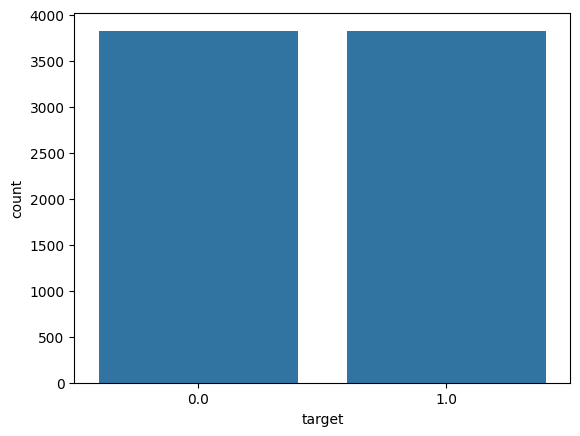

In [34]:
u_sam=RandomUnderSampler(random_state=42)
x_train_u,y_train_u=u_sam.fit_resample(x_train,y_train)
print(y_train_u.value_counts())
sns.barplot(y_train_u.value_counts())

# **Synthetic Minority Oversampling (SMOTE)**

target
1.0    11501
0.0    11501
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

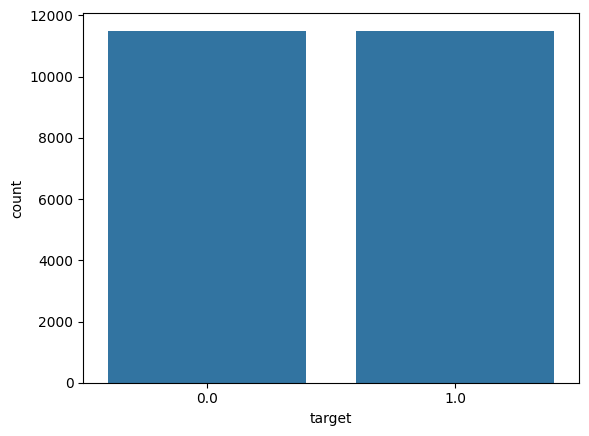

In [35]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
print(y_train_smote.value_counts())
sns.barplot(y_train_smote.value_counts())

# **Adaptive Synthetic Oversampling (ADASYN)**

In [38]:
ada=ADASYN(random_state=42)
x_train_ada,y_train_ada=ada.fit_resample(x_train,y_train)
print(y_train_ada.value_counts())

target
1.0    11589
0.0    11501
Name: count, dtype: int64


# **Borderline Smote**


In [39]:
brsmote=BorderlineSMOTE(random_state=42)
x_train_brsmote,y_train_brsmote=brsmote.fit_resample(x_train,y_train)
print(y_train_brsmote.value_counts())

target
1.0    11501
0.0    11501
Name: count, dtype: int64


# **How do these compare?**
Let's quickly compare our sampling techniques by looking at the differences in the sampling data. Then let's compare the results of after feeding them into a model. This is just a little experiment, but it can show how much of a difference sampling can make depending on your data and models.

Let's train a simple random forest on each of the different types of samples, then let's see the difference in validation accuracy.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_o,y_train_o)
y_pred_o=rf.predict(x_test)


rf.fit(x_train_u,y_train_u)
y_pred_u=rf.predict(x_test)


rf.fit(x_train_smote,y_train_smote)
y_pred_smote=rf.predict(x_test)


rf.fit(x_train_ada,y_train_ada)
y_pred_ada=rf.predict(x_test)


rf.fit(x_train_brsmote,y_train_brsmote)
y_pred_brsmote=rf.predict(x_test)


print('Oversampling Score: %.3f' % accuracy_score(y_test,y_pred_o))
print('Undersampling Score: %.3f' % accuracy_score(y_test,y_pred_u))
print('SMOTE Score: %.3f' % accuracy_score(y_test,y_pred_smote))
print('ADASYN Score: %.3f' % accuracy_score(y_test,y_pred_ada))
print('BorderlineSMOTE Score: %.3f' % accuracy_score(y_test,y_pred_brsmote))



Oversampling Score: 0.778
Undersampling Score: 0.757
SMOTE Score: 0.777
ADASYN Score: 0.780
BorderlineSMOTE Score: 0.779
